In [1]:
# Applied Machine Learning (HOUSECS 59-03)
# Fall 2018, Duke University
# Splines and Linear and Polynomial Regression

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

Let's begin by exploring a dataset that looks at housing prices in Boston: load the data into a Pandas dataframe, and plot it with respect to a single feature, RM (average number of rooms per dwelling).

In [3]:
# load dataset
boston = datasets.load_boston()
print(boston["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df["MEDV"] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


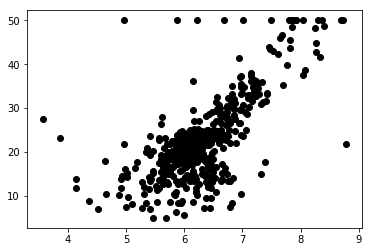

In [5]:
# plot RM vs. MEDV
plt.scatter(df["RM"], df["MEDV"], color="black")

---
We can create a simple linear regression model that takes a single feature (RM) as input to predict the value of a home (MEDV). We can use the first 300 points as training, and test on the remaining 206, making sure to normalize first. Take a look at the mean squared error (MSE) and coefficient(s) for the feature(s), and a plot of how we did with respect to RM.

In [6]:
# create and fit simple model
simple_regr = sklearn.linear_model.LinearRegression(normalize=True)
simple_regr.fit(df.loc[:299, ["RM"]], df.loc[:299, "MEDV"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [7]:
# predict model
simple_pred = simple_regr.predict(df.loc[300:, ["RM"]])
print("mean squared error", sklearn.metrics.mean_squared_error(simple_pred, df.loc[300:, "MEDV"]))
print("coefficients", simple_regr.coef_)

mean squared error 95.71748442676873
coefficients [11.30440747]


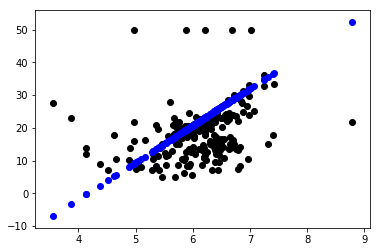

In [8]:
# plot predictions
plt.scatter(df.loc[300:, ["RM"]], df.loc[300:, "MEDV"], color="black") # true labels
plt.scatter(df.loc[300:, ["RM"]], simple_pred, color="blue") # predictions

---
Let's try using all of the features available as input to predict the value of a home (MEDV). Again, we can use the first 300 points as training, and test on the remaining 206, making sure to normalize first. Take a look at the mean squared error (MSE) and coefficient(s) for the feature(s), and a plot of how we did with respect to RM. Notice how the "straight line" disappears, since the predictions are linearly correlated with features in addition to RM in the model.

In [9]:
# create and fit multivariate model
multivariate_regr = sklearn.linear_model.LinearRegression(normalize=True)
multivariate_regr.fit(df.loc[:299, boston.feature_names], df.loc[:299, "MEDV"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [10]:
# predict model
multivariate_pred = multivariate_regr.predict(df.loc[300:, boston.feature_names])
print("mean squared error", sklearn.metrics.mean_squared_error(multivariate_pred, df.loc[300:, "MEDV"]))
print("coefficients", multivariate_regr.coef_)

mean squared error 365.08230091432654
coefficients [ 1.20125417  0.01484179  0.02355189  0.60206504 -8.82764179  9.1306223
 -0.04735918 -1.01328587  0.16786579 -0.01456734 -0.64183404  0.01677883
 -0.10976398]


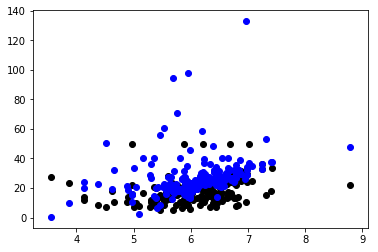

In [11]:
# plot predictions w.r.t. RM
plt.scatter(df.loc[300:, ["RM"]], df.loc[300:, "MEDV"], color="black") # true labels
plt.scatter(df.loc[300:, ["RM"]], multivariate_pred, color="blue") # predictions

---
Let's try expanding to second-order polynomial regression, while still using all of the features available as input to predict the value of a home (MEDV). Again, we can use the first 300 points as training, and test on the remaining 206, making sure to normalize first. Take a look at the mean squared error (MSE) and coefficient(s) for the feature(s), and a plot of how we did with respect to RM.

In [12]:
poly = sklearn.preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly_feat = poly.fit_transform(df[boston.feature_names])

In [13]:
# create and fit polynomial model
poly_regr = sklearn.linear_model.LinearRegression(normalize=True)
poly_regr.fit(poly_feat[:300], df.loc[:299, "MEDV"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [14]:
# predict model
poly_pred = poly_regr.predict(poly_feat[300:])
print("mean squared error", sklearn.metrics.mean_squared_error(poly_pred, df.loc[300:, "MEDV"]))
print("coefficients", poly_regr.coef_)

mean squared error 5514346.828192484
coefficients [-2.02082446e+01 -2.07658396e-01 -3.21185483e+00 -7.25802999e+00
  3.88265224e+02  4.37523878e+01 -5.45886793e-01 -6.85912859e+00
 -3.30326193e+00 -7.19407741e-02 -1.70654454e+00  4.25288944e-01
  3.72633917e+00  2.24804104e+00 -9.46256153e-02  2.94001297e-01
  1.11751845e+00  1.84133905e+00 -2.90611655e-01 -1.33348729e-01
 -2.00378130e+00  2.63212274e+00 -2.99951275e-02  1.89485261e+00
 -5.44560592e-03 -3.77340820e-01 -1.66269516e-04  2.09377847e-03
 -2.21454825e-01  6.56269229e-01  8.65876528e-03 -4.68461020e-04
  8.54027157e-03 -3.21357046e-03  1.97789436e-04 -1.71544646e-02
  3.18818167e-04 -3.66178386e-04  2.09333453e-02 -9.38043146e-01
  6.00062599e+00 -5.16165343e-02  5.79358859e-04  2.38050925e-01
 -7.18778402e-02  3.69555734e-03 -1.10094098e-01  1.48743122e-03
 -2.61216810e-02 -7.25802999e+00  3.50423701e+00 -3.26274345e+00
  7.52065626e-03  3.39247558e+00 -2.09944482e+00  8.19116289e-02
 -7.34107140e-01  9.06357930e-02 -3.1966

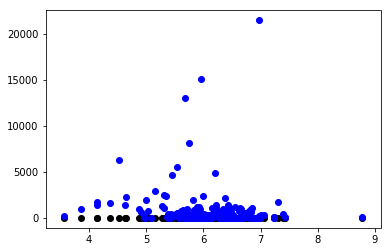

In [15]:
# plot predictions w.r.t. RM
plt.scatter(df.loc[300:, ["RM"]], df.loc[300:, "MEDV"], color="black") # true labels
plt.scatter(df.loc[300:, ["RM"]], poly_pred, color="blue") # predictions

---
Notice how in the previous example we overfit the data, since we had so many features! Let's try adding some regularization using ridge regression, while still using second-order polynomial regression and all of the features available as input to predict the value of a home (MEDV). Again, we can use the first 300 points as training, and test on the remaining 206, making sure to normalize first. Take a look at the mean squared error (MSE) and coefficient(s) for the feature(s), and a plot of how we did with respect to RM.

In [16]:
# create and fit regularized model
regularized_regr = sklearn.linear_model.Ridge(normalize=True, alpha=150)
regularized_regr.fit(poly_feat[:300], df.loc[:299, "MEDV"])

Ridge(alpha=150, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [17]:
# predict model
regularized_pred = regularized_regr.predict(poly_feat[300:])
print("mean squared error", sklearn.metrics.mean_squared_error(regularized_pred, df.loc[300:, "MEDV"]))
print("coefficients", regularized_regr.coef_)

mean squared error 70.83493066859938
coefficients [-1.34413465e-02  6.05412633e-04 -2.98552794e-03  1.55993520e-02
 -1.03538598e-01  6.96334338e-02 -4.51995474e-04  6.70648350e-04
  1.61841519e-03 -2.22873411e-04 -1.06915527e-02  2.52521389e-04
 -5.90155939e-03 -4.65923369e-03  5.88460702e-03 -6.89572158e-04
 -8.06339716e-05 -1.87878258e-02 -1.10564854e-03 -1.46224658e-04
 -8.40412584e-03 -1.89609118e-03 -3.37726311e-05 -1.15894323e-03
 -3.07910111e-05 -1.26073923e-03  7.12231399e-06  9.62246327e-05
  1.56143560e-03  1.58576324e-03  1.01312236e-04  1.71071600e-05
  6.17769680e-05  1.45878788e-04  1.65289708e-06  3.26734263e-05
  1.56165866e-06  2.44696072e-05 -9.23743632e-05  4.49668674e-04
 -3.89871288e-03 -3.40892161e-04 -2.57443974e-05 -1.48014550e-03
 -5.40475016e-04 -6.88482689e-06 -1.86975382e-04 -7.45686486e-06
 -2.03768049e-04  1.55993520e-02  1.33690329e-02  3.65256972e-03
  9.06858317e-05  6.49773713e-03  1.89923638e-03  4.02201902e-05
  7.92320150e-04  4.83383671e-05 -1.0789

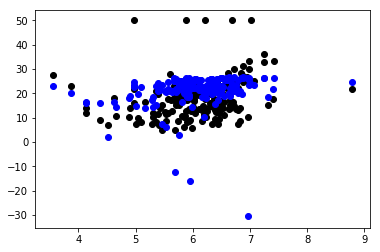

In [18]:
# plot predictions w.r.t. RM
plt.scatter(df.loc[300:, ["RM"]], df.loc[300:, "MEDV"], color="black") # true labels
plt.scatter(df.loc[300:, ["RM"]], regularized_pred, color="blue") # predictions